<a href="https://colab.research.google.com/github/GiuliaFContardi/FL_IDS-GAN/blob/main/RandomForest_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import

In [ ]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# data is stored in google drive folder so import drive to notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##GEN DATASET (valutazione GAN)

#### Classi maggiori

In [ ]:
#Aggiungere labels e solo dopo unire tutti i gen
dfBenign = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBase/genBenign.csv')
dfPortscan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBase/genPortscan.csv')
dfDoS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBase/genDoS.csv')
dfDDoS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBase/genDDoS.csv')

#### CSV classi minori con valori minimi

In [ ]:
dfBruteforce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBase/Bruteforce/genBruteforce_pochiNuovi.csv')
dfBotnet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBase/Botnet/genBotnet_pochiNuovi.csv')

#### CSV con 10000 samples x classi minori

In [ ]:
dfBruteforce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBase/Bruteforce/genBruteforce_10000.csv')
dfBotnet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBase/Botnet/genBotnet_10000.csv')

#### Resto...TUTTE CLASSI

In [ ]:
#rows_to_drop = range(2000)
#df_dropped_Botnet = dfBotnet.drop(rows_to_drop)

# Display the DataFrame after dropping rows
#print(df_dropped_Botnet.shape)

#dfBotnet=df_dropped_Botnet

In [ ]:
dfBenign['L_BENIGN'] = 1
dfPortscan['L_Infiltration_Portscan'] = 1
dfDoS['L_DoS'] = 1
dfDDoS['L_DDoS'] = 1
dfBruteforce['L_BruteForce'] = 1
dfBotnet['L_Botnet'] = 1

dfBenign['L_Infiltration_Portscan'] = 0
dfBenign['L_DoS'] = 0
dfBenign['L_DDoS'] = 0
dfBenign['L_BruteForce'] = 0
dfBenign['L_Botnet'] = 0

dfPortscan['L_BENIGN'] = 0
dfPortscan['L_DoS'] = 0
dfPortscan['L_DDoS'] = 0
dfPortscan['L_BruteForce'] = 0
dfPortscan['L_Botnet'] = 0

dfDoS['L_BENIGN'] = 0
dfDoS['L_Infiltration_Portscan'] = 0
dfDoS['L_DDoS'] = 0
dfDoS['L_BruteForce'] = 0
dfDoS['L_Botnet'] = 0

dfDDoS['L_BENIGN'] = 0
dfDDoS['L_Infiltration_Portscan'] = 0
dfDDoS['L_DoS'] = 0
dfDDoS['L_BruteForce'] = 0
dfDDoS['L_Botnet'] = 0

dfBruteforce['L_BENIGN'] = 0
dfBruteforce['L_Infiltration_Portscan'] = 0
dfBruteforce['L_DoS'] = 0
dfBruteforce['L_DDoS'] = 0
dfBruteforce['L_Botnet'] = 0

dfBotnet['L_BENIGN'] = 0
dfBotnet['L_Infiltration_Portscan'] = 0
dfBotnet['L_DoS'] = 0
dfBotnet['L_DDoS'] = 0
dfBotnet['L_BruteForce'] = 0

In [ ]:
merged_df = pd.concat([dfBenign, dfPortscan, dfDoS, dfDDoS, dfBruteforce, dfBotnet], axis=0, ignore_index=True)

In [ ]:
merged_df.shape

(1469838, 41)

In [ ]:
col_labels = ['L_BENIGN', 'L_Infiltration_Portscan', 'L_DoS', 'L_DDoS', 'L_BruteForce', 'L_Botnet']
y_train = merged_df[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
X_train = merged_df.drop(columns=col_labels)

In [ ]:
print("Samples per classe GEN")
print((merged_df['L_BENIGN']==1).values.sum())
print((merged_df['L_Infiltration_Portscan']==1).values.sum())
print((merged_df['L_DoS']==1).values.sum())
print((merged_df['L_DDoS']==1).values.sum())
print((merged_df['L_BruteForce']==1).values.sum())
print((merged_df['L_Botnet']==1).values.sum())

Samples per classe GEN
1116095
161597
120134
66593
4904
515


In [ ]:
X_train.shape

(1469838, 35)

In [ ]:
merged_df_final = merged_df
from sklearn.utils import shuffle
merged_df_final = shuffle(merged_df_final).reset_index()
merged_df_final = merged_df_final.drop("index", axis=1) #elimino colonna indice creata dal reset_index

In [ ]:
merged_df_final.shape

(1469838, 41)

#### Resto...SOLO CLASSI MINORI

In [ ]:
dfBruteforce['L_BruteForce'] = 1
dfBotnet['L_Botnet'] = 1

dfBruteforce['L_BENIGN'] = 0
dfBruteforce['L_Infiltration_Portscan'] = 0
dfBruteforce['L_DoS'] = 0
dfBruteforce['L_DDoS'] = 0
dfBruteforce['L_Botnet'] = 0

dfBotnet['L_BENIGN'] = 0
dfBotnet['L_Infiltration_Portscan'] = 0
dfBotnet['L_DoS'] = 0
dfBotnet['L_DDoS'] = 0
dfBotnet['L_BruteForce'] = 0

In [ ]:
merged_df = pd.concat([dfBruteforce, dfBotnet], axis=0, ignore_index=True)
merged_df.shape

(20000, 41)

In [ ]:
col_labels = ['L_BENIGN', 'L_Infiltration_Portscan', 'L_DoS', 'L_DDoS', 'L_BruteForce', 'L_Botnet']
y_train = merged_df[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
X_train = merged_df.drop(columns=col_labels)
X_train.shape

(20000, 35)

In [ ]:
print("Samples per classe GEN")
print((merged_df['L_BENIGN']==1).values.sum())
print((merged_df['L_Infiltration_Portscan']==1).values.sum())
print((merged_df['L_DoS']==1).values.sum())
print((merged_df['L_DDoS']==1).values.sum())
print((merged_df['L_BruteForce']==1).values.sum())
print((merged_df['L_Botnet']==1).values.sum())

Samples per classe GEN
0
0
0
0
10000
10000


In [ ]:
merged_df_final = merged_df
from sklearn.utils import shuffle
merged_df_final = shuffle(merged_df_final).reset_index()
merged_df_final = merged_df_final.drop("index", axis=1) #elimino colonna indice creata dal reset_index

##REAL+GEN DATASET - DATA AUGMENTATION

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/X_train_35.csv')
y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/y_train_35.csv')

print(X_train.shape)
print(y_train.shape)

(1469838, 35)
(1469838, 6)


In [ ]:
dfReal = pd.concat([X_train, y_train], axis=1)

In [ ]:
dfReal.shape

(1469838, 41)

In [ ]:
print(dfReal.shape)
print(merged_df_final.shape)

(1469838, 41)
(20000, 41)


In [ ]:
merged_df_complete = pd.concat([dfReal, merged_df_final], axis=0, ignore_index=True)
print(merged_df_complete.shape)

(1489838, 41)


In [ ]:
merged_df_complete = shuffle(merged_df_complete).reset_index()
merged_df_complete = merged_df_complete.drop("index", axis=1) #elimino colonna indice creata dal reset_index

In [ ]:
col_labels = ['L_BENIGN', 'L_Infiltration_Portscan', 'L_DoS', 'L_DDoS', 'L_BruteForce', 'L_Botnet']
y_train = merged_df_complete[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
X_train = merged_df_complete.drop(columns=col_labels)

In [ ]:
print("Samples per classe X_TRAIN")
print((dfReal['L_BENIGN']==1).values.sum())
print((dfReal['L_Infiltration_Portscan']==1).values.sum())
print((dfReal['L_DoS']==1).values.sum())
print((dfReal['L_DDoS']==1).values.sum())
print((dfReal['L_BruteForce']==1).values.sum())
print((dfReal['L_Botnet']==1).values.sum())
print("====================================")
print("Samples per classe GEN")
print((merged_df_final['L_BENIGN']==1).values.sum())
print((merged_df_final['L_Infiltration_Portscan']==1).values.sum())
print((merged_df_final['L_DoS']==1).values.sum())
print((merged_df_final['L_DDoS']==1).values.sum())
print((merged_df_final['L_BruteForce']==1).values.sum())
print((merged_df_final['L_Botnet']==1).values.sum())
print("====================================")
print("Samples per classe X_TRAIN+GEN")
print((merged_df_complete['L_BENIGN']==1).values.sum())
print((merged_df_complete['L_Infiltration_Portscan']==1).values.sum())
print((merged_df_complete['L_DoS']==1).values.sum())
print((merged_df_complete['L_DDoS']==1).values.sum())
print((merged_df_complete['L_BruteForce']==1).values.sum())
print((merged_df_complete['L_Botnet']==1).values.sum())

Samples per classe X_TRAIN
1116095
161597
120134
66593
4904
515
Samples per classe GEN
0
0
0
0
10000
10000
Samples per classe X_TRAIN+GEN
1116095
161597
120134
66593
14904
10515


In [ ]:
X_train.shape

(1489838, 35)

In [ ]:
y_train.shape

(1489838, 6)

## REAL DATASET

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/X_train_35.csv')
y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/y_train_35.csv')

print(X_train.shape)
print(y_train.shape)

(1469838, 35)
(1469838, 6)


In [ ]:
#result = pd.concat([X_train, y_train], axis=1)
#result.shape
#result['L_BENIGN'].value_counts()

```
(1469838, 41)

BENIGN                   1116095
Infiltration_Portscan     161597
DoS                       120134
DDoS                       66593
BruteForce                  4904
Botnet                       515
```

## TEST DATASET

In [ ]:
X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/X_test_35.csv')
y_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/y_test_35.csv')

print(X_test.shape)
print(y_test.shape)

(629931, 35)
(629931, 6)


In [ ]:
#df_test = pd.concat([X_test, y_test], axis=1)

```
(629931, 41)

BENIGN                    478327
Infiltration_Portscan      69256
DoS                        51486
DDoS                       28540
BruteForce                  2101
Botnet                       221
```

## preparo array

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1489838, 35), (1489838, 6), (629931, 35), (629931, 6))

# **Architettura IDS**



> https://github.com/noushinpervez/Intrusion-Detection-CIC-IDS2017/blob/main/Intrusion-Detection-CIC-IDS2017.ipynb



**Random Forest Classifier**

Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and generalization performance of the model. The basic idea behind random forests is to fit multiple decision trees on random subsets of the training data and average their predictions to reduce overfitting and improve generalization performance.

***Parameters:***

*n_estimators:* This parameter specifies the number of decision trees to fit in the random forest.

*max_depth:* This parameter specifies the maximum depth of each decision tree in the random forest. A deeper tree can capture more complex interactions in the data. In our case, this parameter played a major role getting better results.

*max_features:* This parameter specifies the number of features to consider when looking for the best split in each tree. We trained the first model taking all the features into account and for the second one, we used only 20 features.

*random_state:* As mentioned earliar, this is to ensure that the output is deterministic and can be reproduced.

#### RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#CIT BULAVAS Tables 15
rf3 = RandomForestClassifier(criterion='entropy', class_weight='balanced', n_estimators = 120, max_depth = 15, max_features = 0.5, min_samples_leaf=7, random_state = 0)
rf3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=0.5, min_samples_leaf=7,
                       n_estimators=120, random_state=0)

####Import

In [ ]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, balanced_accuracy_score, precision_recall_curve, multilabel_confusion_matrix

import seaborn as sns

### Preparazione dati

In [ ]:
y_pred_rf3 = rf3.predict(X_test)
y_pred_classes_rf3 = np.argmax(y_pred_rf3, axis=1)

y_test_rounded = np.argmax(y_test, axis=1)

In [ ]:
df_y_pred_classes_rf3 = pd.DataFrame(y_pred_classes_rf3)
df_y_pred_classes_rf3.value_counts()

0    478278
1     69304
3     51488
2     28540
4      2101
5       220
Name: count, dtype: int64

### Valutazione

####Conferma non overfitting: k-cross validation

In [ ]:
# Evaluate performance on training set
y_train_pred_rf3 = rf3.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred_rf3)
print("Training Accuracy:", train_accuracy)

# Evaluate performance on test set
test_accuracy = accuracy_score(y_test_rounded, y_pred_classes_rf3)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9999054317550642
Test Accuracy: 0.9998793518655218


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(rf3, X_train, y_train, cv=k, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.99985713 0.99984012 0.99981971 0.99989795 0.99985032]
Average Cross-Validation Accuracy: 0.99985304505815


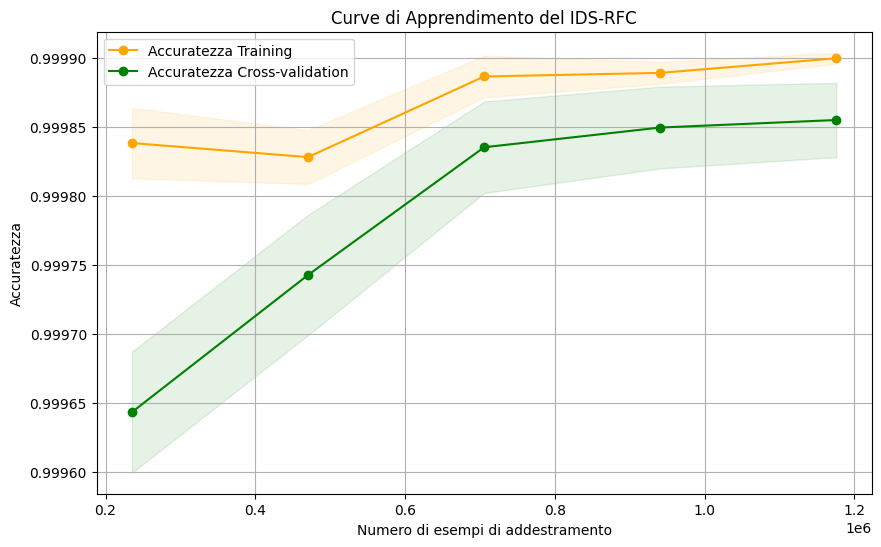

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
images_dir = '/content/drive/MyDrive/Colab Notebooks/progettoTesi/grafici_pdf/IDS_RFC/'



def plot_learning_curve(estimator, X, y, train_sizes):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="orange")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="orange", label="Accuratezza Training")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Accuratezza Cross-validation")
    plt.title("Curve di Apprendimento del IDS-RFC")
    plt.xlabel("Numero di esempi di addestramento")
    plt.ylabel("Accuratezza")
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(f"{images_dir}/IDS_RFC_CurveApprendimento_REAL_checkedOverfitting_cvDefault.pdf", dpi=200, format='pdf')
    plt.show()

# Assuming X_train, y_train are your training data and labels
# and X_test, y_test are your test data and labels

train_sizes = np.array([0.2, 0.4, 0.6, 0.8, 1.0])  # Using 20%, 40%, 60%, 80%, and 100% of training data
plot_learning_curve(rf3, X_train, y_train, train_sizes=train_sizes)


#### Valutazione performance

In [ ]:
conf_matrix_model3 = confusion_matrix(y_test_rounded, y_pred_classes_rf3)


sns.set(font_scale=2.5)
plt.figure(figsize = (20,20))

s = sns.heatmap(conf_matrix_model3, annot = True)#, cmap = 'Blues',fmt='.2f'

s.set_xlabel('Predetti')
s.set_ylabel('Originali')

plt.title("Performance IDS-RFC\n")

#salva in Drive
images_dir = '/content/drive/MyDrive/Colab Notebooks/progettoTesi/grafici_pdf/IDS_RFC/'
plt.savefig(f"{images_dir}/IDS_RFC_GraficoMatrixCONFUSION_REAL_Train-Valid_checkedOverfitting.pdf", dpi=200, format='pdf')

plt.show()




```
(629931, 41)

BENIGN                    478327
Infiltration_Portscan      69256
DoS                        51486
DDoS                       28540
BruteForce                  2101
Botnet                       221
```





In [ ]:
print(classification_report(y_test, y_pred_rf3, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    478327
           1       1.00      1.00      1.00     69256
           2       1.00      1.00      1.00     28540
           3       1.00      1.00      1.00     51486
           4       1.00      1.00      1.00      2101
           5       1.00      0.99      0.99       221

   micro avg       1.00      1.00      1.00    629931
   macro avg       1.00      1.00      1.00    629931
weighted avg       1.00      1.00      1.00    629931
 samples avg       1.00      1.00      1.00    629931



In [ ]:
print(classification_report(y_test, y_pred_rf3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    478327
           1       1.00      1.00      1.00     69256
           2       1.00      1.00      1.00     28540
           3       1.00      1.00      1.00     51486
           4       1.00      1.00      1.00      2101
           5       1.00      0.99      0.99       221

   micro avg       1.00      1.00      1.00    629931
   macro avg       1.00      1.00      1.00    629931
weighted avg       1.00      1.00      1.00    629931
 samples avg       1.00      1.00      1.00    629931



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_pred_rf3, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    478327
           1       1.00      1.00      1.00     69256
           2       1.00      1.00      1.00     28540
           3       1.00      1.00      1.00     51486
           4       1.00      1.00      1.00      2101
           5       1.00      0.99      0.99       221

   micro avg       1.00      1.00      1.00    629931
   macro avg       1.00      1.00      1.00    629931
weighted avg       1.00      1.00      1.00    629931
 samples avg       1.00      1.00      1.00    629931



In [ ]:
acc3=accuracy_score(y_test, y_pred_rf3)
bacc3=balanced_accuracy_score(y_test_rounded, y_pred_classes_rf3)
print('Accuracy:', acc3)
print('Balanced Accuracy:', bacc3)

Accuracy: 0.9998777643900681
Balanced Accuracy: 0.999788769069009


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test_rounded, y_pred_classes_rf3, average=None, zero_division=1)
print('Precision per class:', precision)
print('Recall per class:', recall)
print('F1 score per class:', f1)

Precision per class: [0.99997282 0.99917757 1.         0.99990289 0.99952381 1.        ]
Recall per class: [0.99986829 0.99991336 1.         0.99990289 0.99904807 1.        ]
F1 score per class: [0.99992055 0.99954533 1.         0.99990289 0.99928588 1.        ]


In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test_rounded, y_pred_classes_rf3, average=None)
print('Precision per class:', precision)
print('Recall per class:', recall)
print('F1 score per class:', f1)

Precision per class: [0.99997282 0.99917757 1.         0.99990289 0.99952381 1.        ]
Recall per class: [0.99986829 0.99991336 1.         0.99990289 0.99904807 1.        ]
F1 score per class: [0.99992055 0.99954533 1.         0.99990289 0.99928588 1.        ]


In [ ]:
precisionBase = precision_score(y_test, y_pred_rf3, average='micro', zero_division=1)
print('Precision: %f' % precisionBase)
precision3 = precision_score(y_test, y_pred_rf3, average='weighted', zero_division=1)
print('Weighted Precision: %f' % precision3)
m_precision3 = precision_score(y_test_rounded, y_pred_classes_rf3, average='macro', zero_division=1)
print('Macro Precision: %f' % m_precision3)
print("======================")
recall3 = recall_score(y_test_rounded, y_pred_classes_rf3, average='weighted', zero_division=1)
print('Recall: %f' % recall3)
m_recall3 = recall_score(y_test_rounded, y_pred_classes_rf3, average='macro', zero_division=1)
print('Macro Recall: %f' % m_recall3)
print("=======================")
f13 = f1_score(y_test_rounded, y_pred_classes_rf3, average='weighted', zero_division=1)
print('F1 score: %f' % f13)
m_f13 = f1_score(y_test_rounded, y_pred_classes_rf3, average='macro', zero_division=1)
print('Macro F1 score: %f' % m_f13)

Precision: 0.999881
Weighted Precision: 0.999881
Macro Precision: 0.999763
Recall: 0.999879
Macro Recall: 0.999789
F1 score: 0.999879
Macro F1 score: 0.999776


In [ ]:
precisionBase = precision_score(y_test, y_pred_rf3, average='micro')
print('Precision: %f' % precisionBase)
precision3 = precision_score(y_test, y_pred_rf3, average='weighted')
print('Weighted Precision: %f' % precision3)
m_precision3 = precision_score(y_test_rounded, y_pred_classes_rf3, average='macro')
print('Macro Precision: %f' % m_precision3)
print("======================")
recall3 = recall_score(y_test_rounded, y_pred_classes_rf3, average='weighted')
print('Recall: %f' % recall3)
m_recall3 = recall_score(y_test_rounded, y_pred_classes_rf3, average='macro')
print('Macro Recall: %f' % m_recall3)
print("=======================")
f13 = f1_score(y_test_rounded, y_pred_classes_rf3, average='weighted')
print('F1 score: %f' % f13)
m_f13 = f1_score(y_test_rounded, y_pred_classes_rf3, average='macro')
print('Macro F1 score: %f' % m_f13)

Precision: 0.999881
Weighted Precision: 0.999881
Macro Precision: 0.999763
Recall: 0.999879
Macro Recall: 0.999789
F1 score: 0.999879
Macro F1 score: 0.999776


In [ ]:
labels = [0, 1, 2, 3, 4, 5]

confusion_mat = confusion_matrix(y_test_rounded, y_pred_classes_rf3, labels=labels)

# Calculate additional metrics
for i in range(len(labels)):
    tn = sum(confusion_mat[j, k] for j in range(len(labels)) if j != i for k in range(len(labels)) if k != i)
    fp = sum(confusion_mat[j, i] for j in range(len(labels)) if j != i)
    fn = sum(confusion_mat[i, k] for k in range(len(labels)) if k != i)
    tp = confusion_mat[i, i]

    # Display TP, TN, FP, FN
    print(f"Class {labels[i]} TP:", tp)
    print(f"Class {labels[i]} TN:", tn)
    print(f"Class {labels[i]} FP:", fp)
    print(f"Class {labels[i]} FN:", fn)
    print("============================================")

In [ ]:
# Calculate additional metrics
for i in range(len(labels)):
    tn = sum(confusion_mat[j, k] for j in range(len(labels)) if j != i for k in range(len(labels)) if k != i)
    fp = sum(confusion_mat[j, i] for j in range(len(labels)) if j != i)
    fn = sum(confusion_mat[i, k] for k in range(len(labels)) if k != i)
    tp = confusion_mat[i, i]

    # Calculate additional metrics
    specificity = tn / (tn + fp)
    false_positive_rate = fp / (fp + tn)

    # Display additional metrics
    print(f"Class {labels[i]} Specificity:", specificity)
    print(f"Class {labels[i]} False Positive Rate:", false_positive_rate)
